In [306]:
import np as np
import pandas as pd


df = pd.read_csv('train.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17780\2440722517.py:5: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [307]:
print(len(df))

33538


In [308]:
# df.info()
# df = df.groupby('state').filter(lambda x: len(x) > 1)


In [309]:
df['state'].value_counts()

NY          33519
Ny              4
New York        1
MP              1
NJ              1
ny              1
CA              1
Name: state, dtype: int64

In [310]:
df.drop(['id','host_id','name','summary','country','state','country_code','experiences_offered','space','description','neighborhood_overview',
         'notes','transit','access','interaction','house_rules','host_name'
         ,'host_about','host_acceptance_rate','square_feet'],axis=1, inplace=True)


In [311]:
df.isnull().sum()
df = df.drop(df[(df['accommodates']<3) &
                                        (df['price']>1600)].index)

df = df.drop(df[(df['beds']>13) &
                                        (df['price']<1200)].index)

df = df.drop(df[(df['bedrooms']>7.5) &
                                        (df['price']<1200)].index)

df = df.drop(df[(df['guests_included']>12) &
                                        (df['price']<1000)].index)

df = df.drop(df[(df['bathrooms']>10) &
                                        (df['price']<1000)].index)

df = df.drop(df[(df['review_scores_location']<3) &
                                        (df['price']>300)].index)

df = df.drop(df[(df['calculated_host_listings_count']>100) &
                                        (df['price']>1000)].index)
df = df.drop(df[(df['review_scores_cleanliness']<9) &
                                        (df['price']>1500)].index)
df = df.drop(df[(df['review_scores_rating']<40) &
                                        (df['price']>500)].index)
df = df.drop(df[(df['number_of_reviews']>3500) &
                                        (df['price']>300)].index)
df = df.drop(df[(df['review_scores_value']<2.5) &
                                        (df['price']>500)].index)
df = df.drop(df[(df['minimum_nights']>700) &
                                        (df['price']>100)].index)

<Axes: >

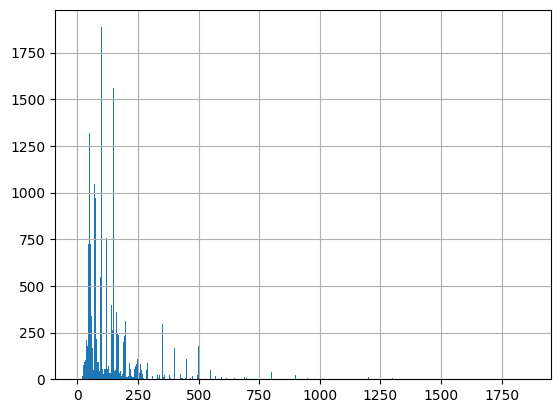

In [312]:
df['price'].hist(bins = 1000)

In [313]:
# # df['host_location'].value_counts().head(50)
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since'] = df['host_since'].dt.year
df['first_review'] = pd.to_datetime(df['first_review'])
df['first_review'] = df['first_review'].dt.year
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'] = df['last_review'].dt.year
df['last_review']

0        2018.0
1        2018.0
2        2018.0
3           NaN
4        2018.0
          ...  
33533    2016.0
33534    2018.0
33535       NaN
33536    2018.0
33537    2018.0
Name: last_review, Length: 33503, dtype: float64

In [314]:
from math import isnan

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

def to_judge(s):
    ret = -1
    if s == "t":
        ret = 1
    if s == "f":
        ret = 0
    return ret

def to_dollar(s):
    try:
        ret = to_float(s.replace("$",""))
    except:
        ret = -1
    return ret

In [315]:
cols1 = ['host_neighbourhood',"host_response_time","host_location","market","city","host_is_superhost","host_has_profile_pic","host_identity_verified"]
for col in cols1:
    df[col].fillna("None", inplace=True)

In [316]:
cols = ["review_scores_value","review_scores_checkin","review_scores_location","review_scores_accuracy","review_scores_communication","review_scores_cleanliness","review_scores_rating","reviews_per_month","zipcode","bathrooms","bedrooms","bedrooms","beds","host_listings_count"]
for col in cols:
    df[col].fillna(0, inplace=True)

In [317]:
cols = ["host_since","first_review","last_review"]
for col in cols:
    df[col].fillna(df[col].median(), inplace=True)
df['price'] = df['price'].fillna(df['price'].mean())
df['host_response_rate'] = df['host_response_rate'].str.strip('%').astype(float)

median_response_rate = df['host_response_rate'].median()
df['host_response_rate'].fillna(median_response_rate, inplace=True)
df['host_response_rate'] = df['host_response_rate'].astype(str) + '%'
df['host_response_rate']

0        100.0%
1        100.0%
2        100.0%
3        100.0%
4        100.0%
          ...  
33533    100.0%
33534    100.0%
33535    100.0%
33536    100.0%
33537     92.0%
Name: host_response_rate, Length: 33503, dtype: object

In [318]:
df['extra_people'] = df['extra_people'].str.strip('$').astype(float)

median_response_rate = df['extra_people'].median()
df['extra_people'].fillna(median_response_rate, inplace=True)
df['extra_people'] = '$'+df['extra_people'].astype(str)
df['extra_people']

0        $30.0
1        $19.0
2         $0.0
3         $0.0
4        $14.0
         ...  
33533    $25.0
33534     $0.0
33535     $0.0
33536     $0.0
33537    $25.0
Name: extra_people, Length: 33503, dtype: object

In [319]:
categories1 = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
categories2 = [x for x in list(set(df['host_neighbourhood'])) if type(x) is str]
categories3 = [x for x in list(set(df['host_response_time'])) if type(x) is str]
categories4 = [x for x in list(set(df['host_response_rate'])) if type(x) is str]
categories5 = [x for x in list(set(df['host_location'])) if type(x) is str]
categories8 = [x for x in list(set(df['property_type'])) if type(x) is str]
categories9 = [x for x in list(set(df['room_type'])) if type(x) is str]
categories10 = [x for x in list(set(df['bed_type'])) if type(x) is str]
categories13 = [x for x in list(set(df['cancellation_policy'])) if type(x) is str]

print(len(categories1))

def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_dollar(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    accommodates = to_int(row.accommodates)
    beds = to_int(row.beds)
    zipcode = to_int(row.zipcode)
    reviews_per_month = to_float(row.reviews_per_month)
    review = to_float(row.review_scores_rating)
    host_listings_count = to_int(row.host_listings_count)
    review_scores_accuracy = to_int(row.review_scores_accuracy)
    review_scores_communication = to_int(row.review_scores_communication)
    review_scores_cleanliness = to_int(row.review_scores_cleanliness)
    review_scores_checkin = to_int(row.review_scores_checkin)
    review_scores_value = to_int(row.review_scores_value)
    minimum_nights = to_int(row.minimum_nights)
    maximum_nights = to_int(row.maximum_nights)
    number_of_reviews = to_int(row.number_of_reviews)
    is_business_travel_ready = to_judge(row.is_business_travel_ready)
    host_is_superhost = to_judge(row.host_is_superhost)
    host_has_profile_pic = to_judge(row.host_has_profile_pic)
    host_identity_verified = to_judge(row.host_identity_verified)
    instant_bookable = to_judge(row.instant_bookable)
    host_since = to_float(row.host_since)
    review1 = to_float(row.last_review) - to_float(row.first_review)
    require_guest_profile_picture = to_judge(row.require_guest_profile_picture)
    require_guest_phone_verification = to_judge(row.require_guest_phone_verification)
    one_hot1 = [int(row.neighbourhood_group_cleansed == category) for category in categories1]
    one_hot2 = [int(row.host_neighbourhood == category) for category in categories2]
    one_hot3 = [int(row.host_response_time == category) for category in categories3]
    one_hot4 = [int(row.host_response_rate == category) for category in categories4]
    one_hot5 = [int(row.host_location == category) for category in categories4]
    one_hot8 = [int(row.property_type == category) for category in categories8]
    one_hot9 = [int(row.room_type == category) for category in categories9]
    one_hot10 = [int(row.bed_type == category) for category in categories10]
    one_hot13 = [int(row.cancellation_policy == category) for category in categories13]


    return [guest_num, guest_cap, bedrooms, bathrooms,
            accommodates, beds, zipcode, instant_bookable,
            reviews_per_month, host_listings_count,
            review_scores_accuracy, review_scores_communication,
            review_scores_cleanliness, review_scores_checkin,
            review_scores_value, minimum_nights, maximum_nights,
            number_of_reviews, review,is_business_travel_ready,host_is_superhost,
            host_has_profile_pic, host_identity_verified,require_guest_profile_picture,
            require_guest_phone_verification,host_since,review1] + one_hot1 + one_hot2 + one_hot3 + one_hot4 + one_hot5 + one_hot8 + one_hot9 + one_hot10 + one_hot13



5


In [320]:
X, y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    X.append(feature)
    y.append(price)

print(len(X), len(y))


33503 33503


In [321]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# df.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [322]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
import numpy as np
import xgboost as xgb
# model = RandomForestRegressor()
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(model.predict(X_test), y_test))}')
print(f'R2_score:{r2_score(model.predict(X_test),y_test)}')


RMSE:88.88138789633201
R2_score:0.2732806018675703


In [323]:
import pandas as pd

test_df = pd.read_csv('test.csv')


test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
test_y = model.predict(test_X)


print(len(test_y))


output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('simple_linear_regression_baseline.csv', index = False)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17780\3405882561.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('test.csv')


17337
